In [1]:
import pandas as pd
from pymongo import MongoClient
from plotnine import * 
import seaborn as sns

In [2]:
#데이터 베이스 접속 설정(MongoDB 사용)
def MongoDbCon(Type):
    conn = MongoClient('접속 IP') #MongoClient(접속 IP 입력)
    db = conn.lotto
    try:
        if Type == 'LottoArea':
            LottoArea = db.TblLottoLocal
        elif Type == 'LottoNumber':
            LottoNumber = db.TblLottoNumber
    except:
        print('데이터베이스 연결 오류 발생')
    finally:
        conn.close()
    return LottoArea if Type == 'LottoArea' else LottoNumber if Type == 'LottoNumber'else ''    

In [3]:
#전체 지역과 당첨회수 막대 그래프 형식 표현 함수
def LottoTotAreaView():
    LottoArea = MongoDbCon('LottoArea')
    LottoTotArea = list(LottoArea.aggregate([{'$group' : {'_id' : '$Area', 'Count' : {'$sum' : 1}}},{'$sort' : {'Count': -1}}]))
    
    LottoTotAreaPdf = pd.DataFrame(LottoTotArea)
    LottoTotAreaPdf.columns.values[0] = '당첨횟수'
    LottoTotAreaPdf.columns.values[1] = '지역'
    
    #막대그래프
    print((ggplot(LottoTotAreaPdf.sort_values(by=['지역'], ascending=False))
         + aes(x='지역', y='당첨횟수', fill = '지역')
         + geom_bar(stat='identity', position='dodge')           
         + theme(text=element_text(family='NanumBarunGothic'))
    ))     
    

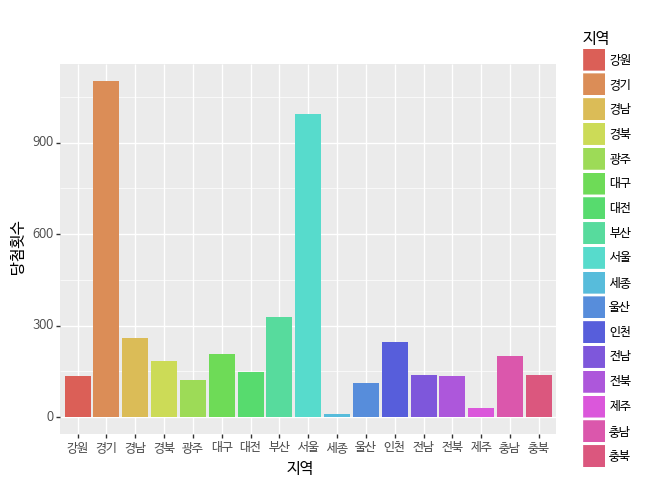

<ggplot: (-9223371893521887989)>


In [4]:
LottoTotAreaView()

In [6]:
#해당 지역에 내부의 상위 당첨횟수 5군데 막대 그래프 형식 표현 함수
def LottoAreaView(Area):    
    LottoArea = MongoDbCon('LottoArea')
    LottoAreaGroup = list(LottoArea.aggregate([{'$match': {'Area' : Area}}, {'$group' : {'_id' : '$Addr', 'Count' : {'$sum' : 1}}},
                                               {'$sort' : {'Count': -1}}, {'$limit' : 5}
                                             ]))
    LottoAreaGroupPdf = pd.DataFrame(LottoAreaGroup)
    LottoAreaGroupPdf.columns.values[0] = '당첨횟수'
    LottoAreaGroupPdf.columns.values[1] = '지역'
    #막대그래프
    print((ggplot(LottoAreaGroupPdf.sort_values(by=['지역'], ascending=False))
         + aes(x='지역', y='당첨횟수', fill = '지역')
         + geom_bar(stat='identity', position='dodge')    
         + coord_flip()  
         + theme(text=element_text(family='NanumBarunGothic'))
    ))    
        

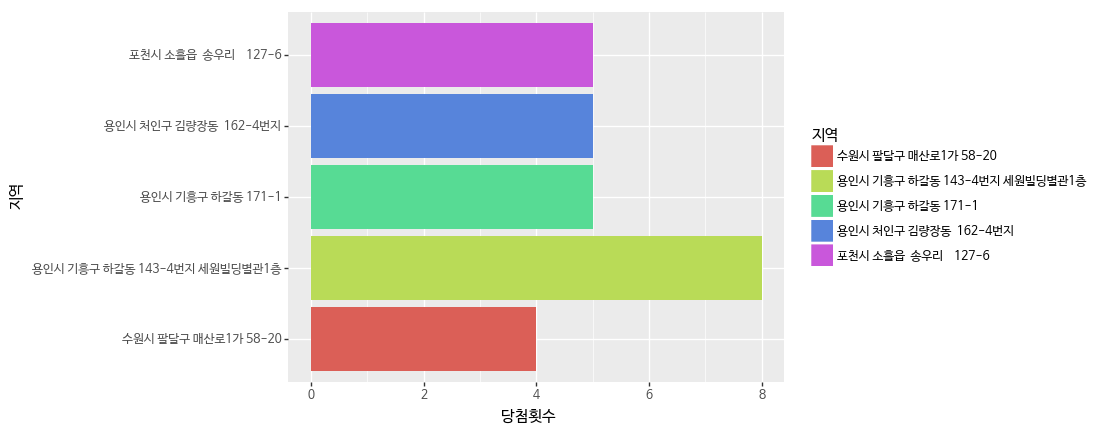

<ggplot: (-9223371913210753827)>


In [7]:
LottoAreaView('경기')

In [50]:
#해당 지역 및 (읍,면,동) 에 내부의 상위 당첨횟수 5군데 막대 그래프 형식 표현 함수
def LottoAddrView(Area,Addr):
    LottoArea = MongoDbCon('LottoArea')
    
    LottoAddrGroup = list(LottoArea.aggregate([{'$match': {'Area' : Area, 'Addr':{'$regex' : Addr}}},
                                               {'$group': {'_id' : '$Addr', 'Count' : {'$sum' : 1}}},
                                               {'$sort':{'Count': -1}},
                                               {'$limit' : 5}    
                                              ]))
    if LottoAddrGroup == []:
        return
    else:
        LottoAddrGroupPdf = pd.DataFrame(LottoAddrGroup)
        LottoAddrGroupPdf.columns.values[0] = '당첨횟수'
        LottoAddrGroupPdf.columns.values[1] = '지역'
        
        #막대 그래프
        print((ggplot(LottoAddrGroupPdf.sort_values(by=['지역'], ascending=False))
         + aes(x='지역', y='당첨횟수', fill = '지역')
         + geom_bar(stat='identity', position='dodge')    
         + coord_flip()  
         + theme(text=element_text(family='NanumBarunGothic'))
        ))    
        
    

[{'_id': '성남시 분당구 야탑동 360-6 메트로빌딩119', 'Count': 2}, {'_id': '성남시 분당구 야탑동 355-1세화2001빌딩107', 'Count': 2}, {'_id': '성남시 분당구 야탑동 275-4번지성원프라자103호', 'Count': 1}, {'_id': '성남시 분당구 야탑동 151테크노파크상가109호', 'Count': 1}, {'_id': '성남시 분당구 야탑동 353-1번지 영진다이비스117호', 'Count': 1}]


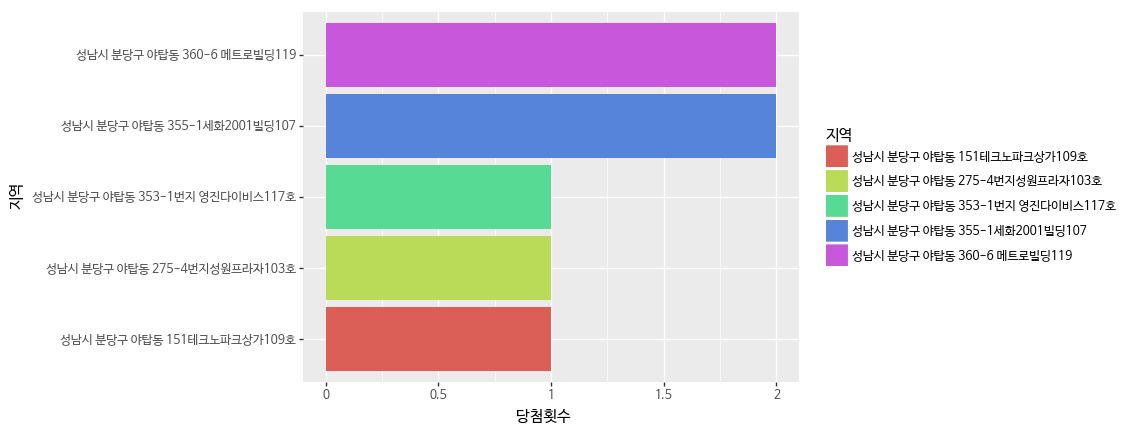

<ggplot: (-9223371913209727996)>


In [58]:
LottoAddrView('경기','야탑')